In [1]:
import warnings
warnings.filterwarnings('ignore')
#경고를 띄우지않겠다.

In [5]:
import pandas as pd
import numpy as np
import re #정규표현식
from plotnine import *

%matplotlib inline
#notebook을 실행한 브라우저에서 바로 그림확인가능

In [115]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A0F8-1544

 C:\Users\Sijune Lee\Desktop\python_analysis\data 디렉터리

2019-09-15  오후 10:55    <DIR>          .
2019-09-15  오후 10:55    <DIR>          ..
2019-09-15  오후 10:56    <DIR>          apt_price
               0개 파일                   0 바이트
               3개 디렉터리  12,915,924,992 바이트 남음


In [4]:
%pwd

'C:\\Users\\Sijune Lee\\Desktop\\python_analysis'

In [6]:
pre_sale=pd.read_csv('data/apt_price/전국_평균_분양가격_2018.7월_.csv',
                    encoding='euc-kr')
pre_sale.shape

(2890, 5)

In [7]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [8]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [9]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 79.1+ KB


In [10]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [11]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

In [13]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

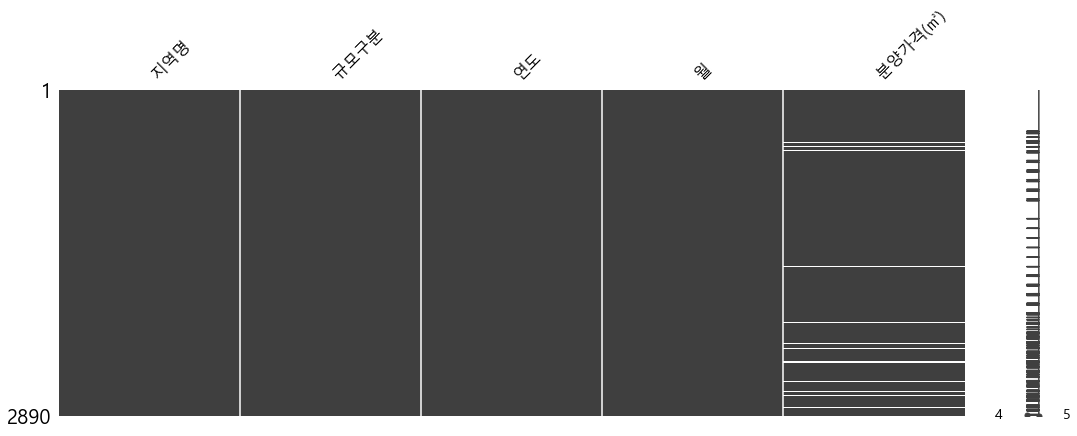

In [14]:
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [15]:
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [16]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
dtypes: object(5)
memory usage: 56.5+ KB


In [17]:
pre_sale_price = pre_sale['분양가격(㎡)']
pre_sale_price.head()

0    5841
1    5652
2    5882
3    5721
4    5879
Name: 분양가격(㎡), dtype: object

In [18]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해볼까요.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [19]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 101.7+ KB


In [20]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [21]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [22]:

pre_sale.describe()

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [23]:
pre_sale.describe?

In [24]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,강원,전용면적 102㎡초과,2017,7,2221
freq,170,578,1020,255,17


In [25]:

# 2017년 데이터만 봅니다.
pre_sale_2017 = pre_sale[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [26]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전용면적 102㎡초과          578
전용면적 60㎡이하           578
전용면적 60㎡초과 85㎡이하     578
전체                   578
전용면적 85㎡초과 102㎡이하    578
Name: 규모구분, dtype: int64

In [27]:

pre_sale['지역명'].value_counts()

강원    170
인천    170
전남    170
경북    170
대구    170
부산    170
충북    170
울산    170
경기    170
경남    170
광주    170
충남    170
대전    170
제주    170
서울    170
세종    170
전북    170
Name: 지역명, dtype: int64

## 전국 평균 분양가격
* groupby와 pivot_table 활용하기

In [28]:
pre_sale.groupby?

In [29]:
pre_sale.groupby(pre_sale.연도).describe().T

연도                    2015          2016          2017          2018
분양가격   count    243.000000    984.000000    899.000000    532.000000
       mean    2788.707819   2934.250000   3139.541713   3298.567669
       std      976.861182   1071.441561   1107.584870   1195.955014
       min     1868.000000   1900.000000   1976.000000   2076.000000
       25%     2225.000000   2282.000000   2365.000000   2471.000000
       50%     2516.000000   2672.000000   2849.000000   2914.000000
       75%     3025.500000   3148.500000   3456.000000   3647.250000
       max     7092.000000   8096.000000   7887.000000   8098.000000
평당분양가격 count    243.000000    984.000000    899.000000    532.000000
       mean    9202.735802   9683.025000  10360.487653  10885.273308
       std     3223.641902   3535.757150   3655.030071   3946.651548
       min     6164.400000   6270.000000   6520.800000   6850.800000
       25%     7342.500000   7530.600000   7804.500000   8154.300000
       50%     8302.800000   8817.600000   9401.700000   9616.200000
       75%     9984.150000  10390.050000  11404.800000  12035.925000
       max    23403.600000  26716.800000  26027.100000  26723.400000

In [30]:
pre_sale.pivot_table?

In [31]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,9837.226667,10388.728272,11334.484615,11235.314563
전용면적 60㎡이하,8951.525000,9398.876119,10246.133333,10911.633333
전용면적 60㎡초과 85㎡이하,8891.817647,9295.986765,9825.000000,10463.662185
전용면적 85㎡초과 102㎡이하,9518.506250,10122.355435,10540.402454,11483.085542
전체,8893.047059,9293.042647,9901.270588,10563.022689


## 전국 분양가 변동금액

In [32]:
region_year_all = pre_sale[pre_sale['규모구분'] == '전체']
region_year_all


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
5,인천,전체,2015,10,3163,3163.0,10437.9
10,경기,전체,2015,10,3138,3138.0,10355.4
15,부산,전체,2015,10,3112,3112.0,10269.6
20,대구,전체,2015,10,2682,2682.0,8850.6
...,...,...,...,...,...,...,...
2865,전북,전체,2018,7,2333,2333.0,7698.9
2870,전남,전체,2018,7,2357,2357.0,7778.1
2875,경북,전체,2018,7,2674,2674.0,8824.2
2880,경남,전체,2018,7,2696,2696.0,8896.8


In [33]:
region_year = region_year_all.pivot_table(
'평당분양가격', '지역명', '연도').reset_index()
#기본값이 mean이다.
region_year

연도,지역명,2015,2016,2017,2018
0,강원,7159.9,7011.125,7126.8,7640.914286
1,경기,10377.4,11220.000,11850.0,12880.842857
2,경남,7585.6,7847.950,8119.8,8894.442857
3,경북,7170.9,7360.650,7794.9,8341.928571
4,광주,8052.0,8898.725,9463.5,9637.885714
5,대구,9232.3,10310.025,11455.8,11737.157143
6,대전,8098.2,8501.625,9044.7,9604.414286
7,부산,10307.0,10429.925,11577.9,12756.385714
8,서울,19725.2,20663.500,21375.9,22328.742857
9,세종,8750.5,8860.500,9135.3,10374.728571


In [34]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']
                     ).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print(f'2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {max_delta_price:,.0f}원이다.')
print(f'상승액이 가장 작은 지역은 울산이며 평당 {min_delta_price:,.0f}원이다.')
print(f'하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print(f'전국 평균 변동액은 평당 {mean_delta_price:,.0f}원이다.')

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,087,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 369,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,669,588원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,7159.9,7011.125,7126.8,7640.914286,481
1,경기,10377.4,11220.000,11850.0,12880.842857,2503
2,경남,7585.6,7847.950,8119.8,8894.442857,1308
3,경북,7170.9,7360.650,7794.9,8341.928571,1171
4,광주,8052.0,8898.725,9463.5,9637.885714,1585
5,대구,9232.3,10310.025,11455.8,11737.157143,2504
6,대전,8098.2,8501.625,9044.7,9604.414286,1506
7,부산,10307.0,10429.925,11577.9,12756.385714,2449
8,서울,19725.2,20663.500,21375.9,22328.742857,2603
9,세종,8750.5,8860.500,9135.3,10374.728571,1624


In [35]:
region_year_all

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
5,인천,전체,2015,10,3163,3163.0,10437.9
10,경기,전체,2015,10,3138,3138.0,10355.4
15,부산,전체,2015,10,3112,3112.0,10269.6
20,대구,전체,2015,10,2682,2682.0,8850.6
...,...,...,...,...,...,...,...
2865,전북,전체,2018,7,2333,2333.0,7698.9
2870,전남,전체,2018,7,2357,2357.0,7778.1
2875,경북,전체,2018,7,2674,2674.0,8824.2
2880,경남,전체,2018,7,2696,2696.0,8896.8


In [36]:
import seaborn as sns #통계 데이터 비주얼화
sns.set_style('whitegrid')

In [38]:
import matplotlib.pyplot as plt #그래프 표시를 가능케한다.
plt.rc('font', family='Malgun Gothic')

## 연도별

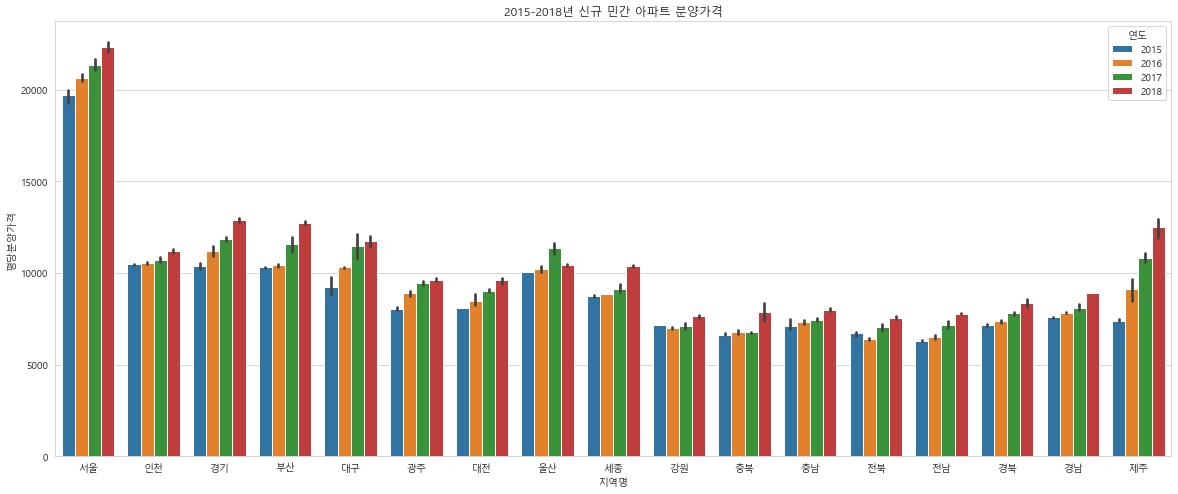

In [39]:
plt.figure(figsize=(20,8))
plt.title('2015-2018년 신규 민간 아파트 분양가격')
sns.barplot(data=region_year_all, x='지역명', y= '평당분양가격', hue='연도')

In [35]:
df_year_region = pd.pivot_table(region_year_all, index=['지역명'], columns='연도', values='평당분양가격')
df_year_region.sample(3)

연도,2015,2016,2017,2018
지역명,,,,
대전,8098.2,8501.625,9044.7,9604.414286
서울,19725.2,20663.500,21375.9,22328.742857
경북,7170.9,7360.650,7794.9,8341.928571


In [40]:
region_year_all.pivot_table('평당분양가격', '지역명', '연도').sample(3)

연도,2015,2016,2017,2018
지역명,,,,
인천,10484.1,10532.500,10736.7,11205.385714
울산,10052.9,10208.550,11345.1,10422.342857
강원,7159.9,7011.125,7126.8,7640.914286


In [36]:
df_year_region.columns

Index(['2015', '2016', '2017', '2018'], dtype='object', name='연도')

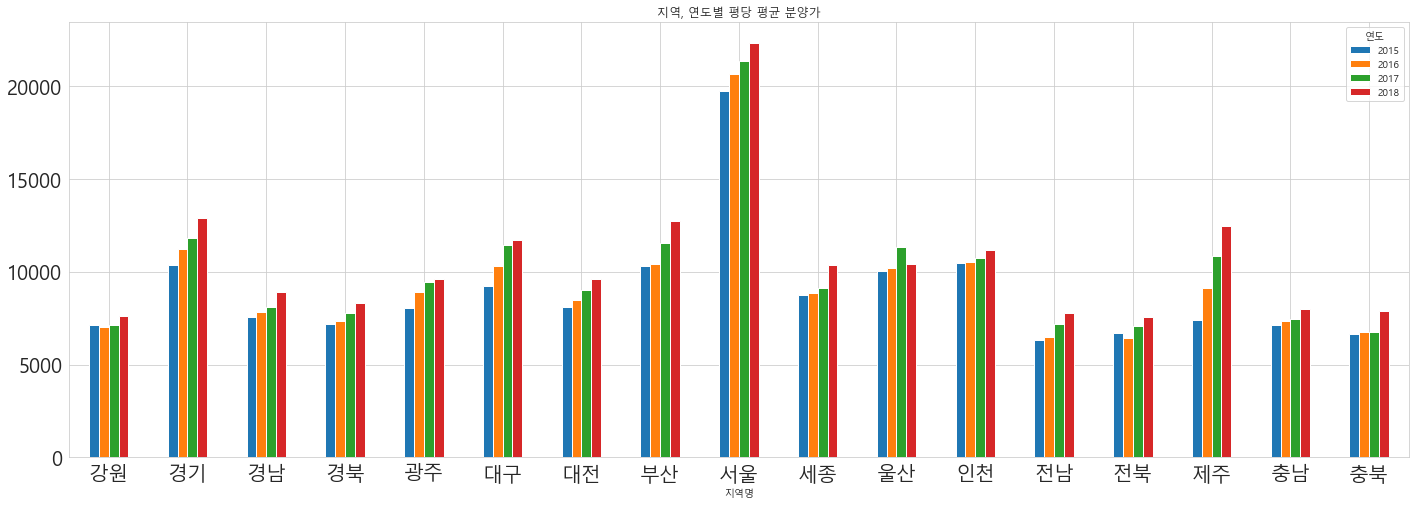

In [37]:
df_year_region.plot.bar(figsize=(24, 8), grid=True, fontsize=20, rot=0, title='지역, 연도별 평당 평균 분양가')

아래는 위 그래프와 동일, 코드만 약간 다를뿐

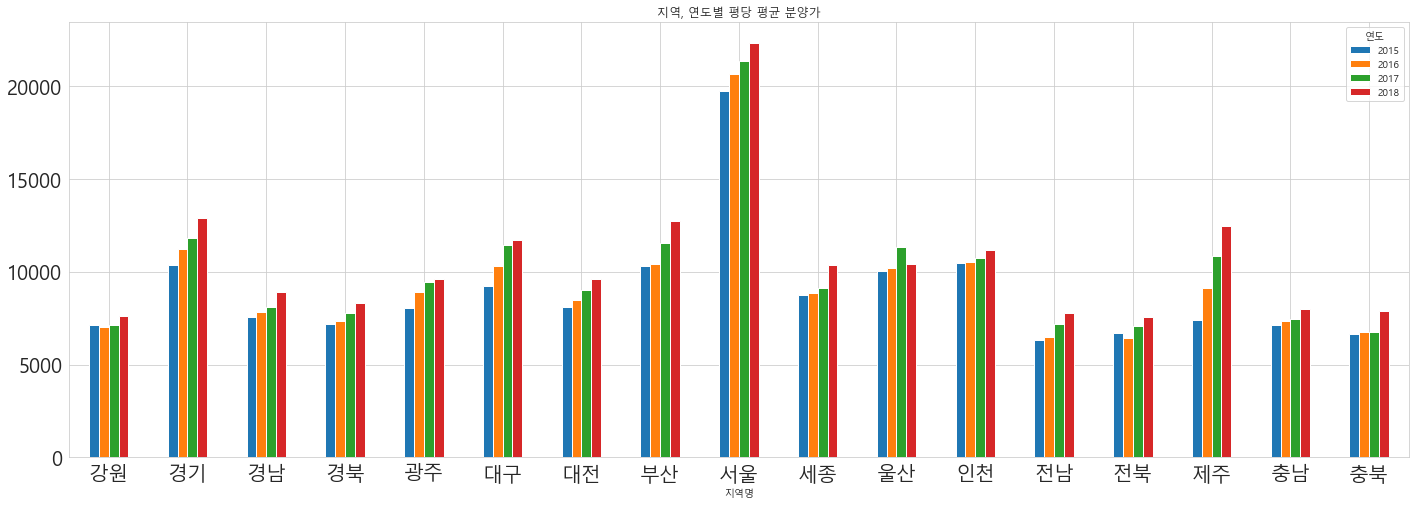

In [41]:
region_year_all.pivot_table('평당분양가격', '지역명', '연도').plot.bar(figsize=(24, 8), grid=True, fontsize=20, rot=0, title='지역, 연도별 평당 평균 분양가')

## 규모별

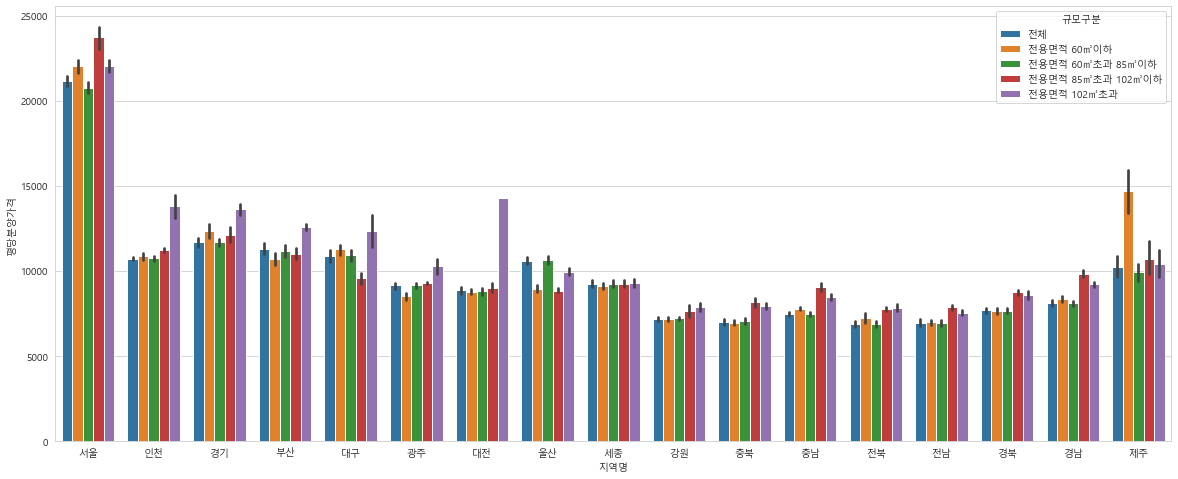

In [42]:
#seaborn, 판다스는 아나콘다를 깔 때 다 설치된다.
import matplotlib.pyplot as plt  
plt.figure(figsize=(20, 8)) #plt는 폰트나 plot사이즈 설정에 사용
sns.barplot(data=pre_sale, x='지역명', y='평당분양가격', hue='규모구분')

## 지역별 평당 분양가격 합계

In [43]:
pre_sale_size = pre_sale.pivot_table(values="평당분양가격", index="지역명", columns='규모구분')
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
경남,9226.1,8343.0,8110.2,9821.9,8136.7
충북,7932.9,6969.1,7044.5,8170.6,6994.3
경기,13646.6,12384.7,11691.1,12130.4,11705.7


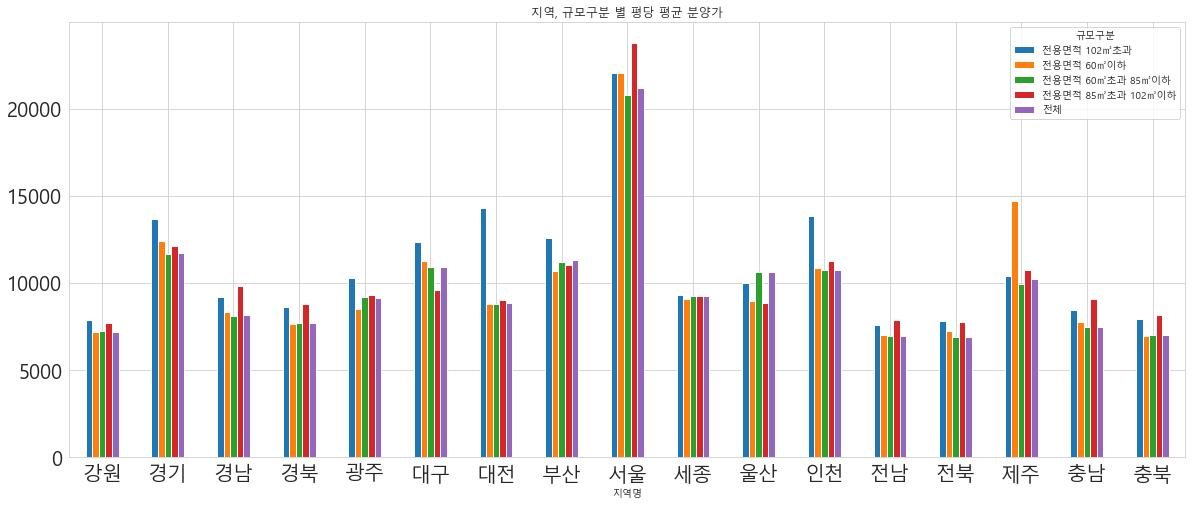

In [44]:
pre_sale_size.plot.bar(title='지역, 규모구분 별 평당 평균 분양가', 
                       figsize=(20, 8), grid=True, fontsize=20, rot=0)

In [45]:
pre_sale[(pre_sale["지역명"] == "대전") &
         (pre_sale["규모구분"] == "전용면적 102㎡초과")]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
34,대전,전용면적 102㎡초과,2015,10,,NaN,NaN
119,대전,전용면적 102㎡초과,2015,11,,NaN,NaN
204,대전,전용면적 102㎡초과,2015,12,,NaN,NaN
289,대전,전용면적 102㎡초과,2016,1,,NaN,NaN
374,대전,전용면적 102㎡초과,2016,2,NaN,NaN,NaN
459,대전,전용면적 102㎡초과,2016,3,NaN,NaN,NaN
544,대전,전용면적 102㎡초과,2016,4,NaN,NaN,NaN
629,대전,전용면적 102㎡초과,2016,5,NaN,NaN,NaN
714,대전,전용면적 102㎡초과,2016,6,NaN,NaN,NaN
799,대전,전용면적 102㎡초과,2016,7,NaN,NaN,NaN


In [46]:
pre_sale_size_t = pre_sale_size.T
pre_sale_size_t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,7898.700,13646.6,9226.1,8615.900,10296.488889,12334.30,14282.400000,12589.8,22058.2,9291.700000,9974.448000,13835.622581,7567.8,7842.000000,10415.790000,8477.900000,7932.9
전용면적 60㎡이하,7195.400,12384.7,8343.0,7661.500,8517.771429,11284.70,8798.200000,10706.8,22045.7,9106.748276,8964.780000,10869.600000,6991.3,7231.500000,14700.230769,7781.800000,6969.1
전용면적 60㎡초과 85㎡이하,7228.300,11691.1,8110.2,7690.500,9175.500000,10930.70,8807.300000,11191.2,20780.9,9271.800000,10640.600000,10747.600000,6967.6,6890.900000,9943.100000,7503.800000,7044.5
전용면적 85㎡초과 102㎡이하,7685.568,12130.4,9821.9,8776.284,9296.100000,9589.14,9037.430769,11038.7,23754.4,9244.900000,8861.007692,11266.600000,7882.3,7769.583871,10739.347826,9090.033333,8170.6
전체,7196.800,11705.7,8136.7,7696.300,9166.800000,10896.70,8879.900000,11294.9,21168.9,9263.300000,10618.600000,10738.900000,6982.5,6902.200000,10253.100000,7494.200000,6994.3


## 전국 규모별 신규 민간 아파트 분양가격

In [47]:
pre_sale.sample()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
2798,경남,전용면적 85㎡초과 102㎡이하,2018,6,2857,2857.0,9428.1


In [48]:
pre_sale[["지역명", "평당분양가격", "규모구분"]].sample(3)

,지역명,평당분양가격,규모구분
1702,서울,21235.5,전용면적 60㎡초과 85㎡이하
1024,서울,23895.3,전용면적 102㎡초과
1,서울,18651.6,전용면적 60㎡이하


In [49]:
pre_sale.shape

(2890, 7)

In [50]:
pre_sale["평당분양가격"].isnull().sum()

232

In [51]:
pre_sale["평당분양가격"].dropna(inplace=True, axis=0)
#axis는 행 기준으로 dropna를 실행하겠다.

In [52]:
pre_sale["평당분양가격"].isnull().sum()

0

In [53]:
pre_sale.shape

(2890, 7)

In [54]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [55]:
pre_sale['평당분양가격'] = pre_sale['평당분양가격'].astype(int)

In [56]:
pre_sale[pre_sale['평당분양가격']==0]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격


In [57]:
pre_sale['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [58]:
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
경북,8615.900,7661.50,7690.5,8776.284000,7696.3
부산,12589.800,10706.80,11191.2,11038.700000,11294.9
울산,9974.448,8964.78,10640.6,8861.007692,10618.6


## 박스 수염 그래프 그리기

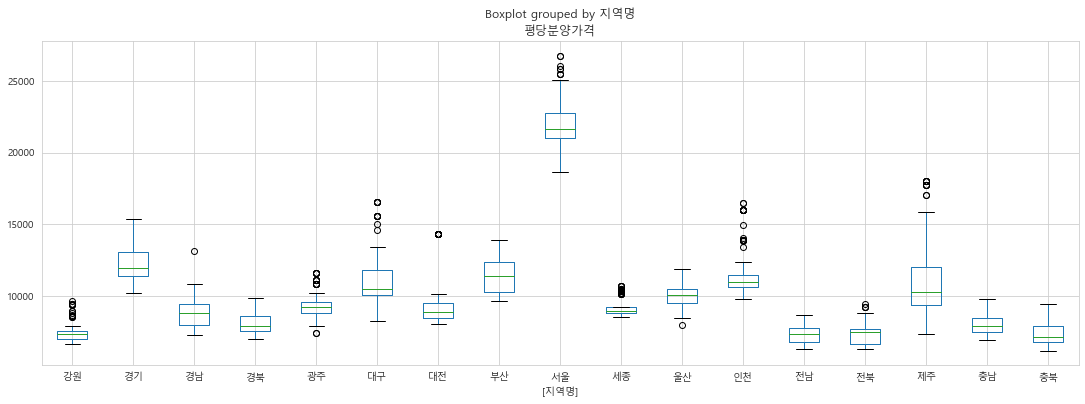

In [59]:
pre_sale[['지역명', '평당분양가격']].boxplot(by=['지역명'], figsize=(18,6))
#수치값만 기준으로 그래프가 생성된다.

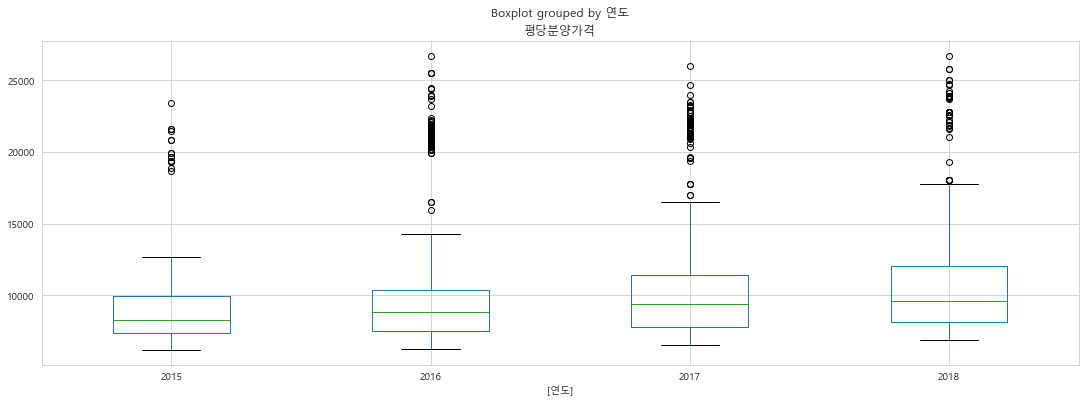

In [60]:
pre_sale[['연도', '평당분양가격']].boxplot(by='연도', figsize=(18,6))

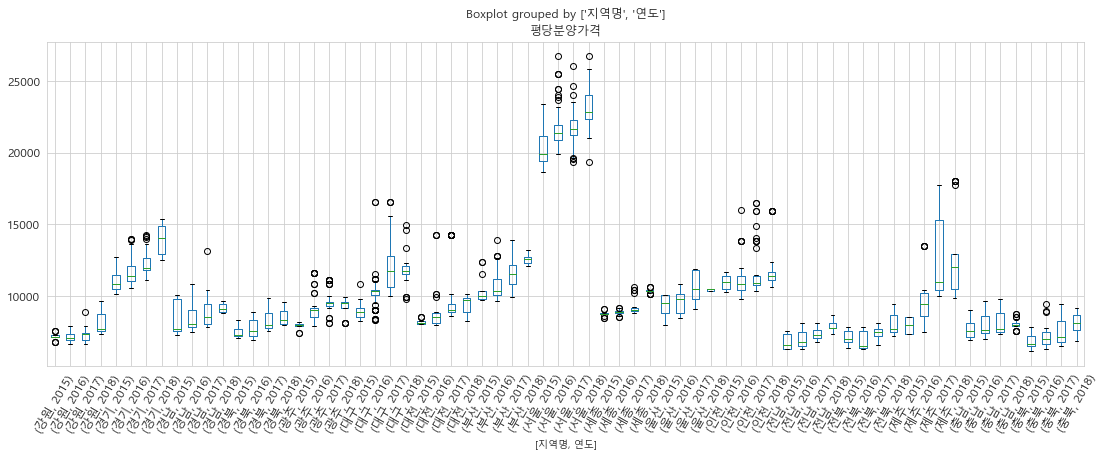

In [61]:
pre_sale[['연도', '지역명', '평당분양가격']].boxplot(
    by=['지역명', '연도'],
    figsize=(18, 6), 
    fontsize=12,
    rot=60)

In [62]:
pre_sale['지역명']=='서울'

0        True
1        True
2        True
3        True
4        True
        ...  
2885    False
2886    False
2887    False
2888    False
2889    False
Name: 지역명, Length: 2890, dtype: bool

In [63]:
pre_sale[pre_sale['지역명']=='서울']

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.0
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.0
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.0
...,...,...,...,...,...,...,...
2805,서울,전체,2018,7,6820,6820.0,22506.0
2806,서울,전용면적 60㎡이하,2018,7,7360,7360.0,24288.0
2807,서울,전용면적 60㎡초과 85㎡이하,2018,7,6910,6910.0,22803.0
2808,서울,전용면적 85㎡초과 102㎡이하,2018,7,7591,7591.0,25050.0


In [64]:
pre_sale_seoul = pre_sale[pre_sale['지역명']=='서울']

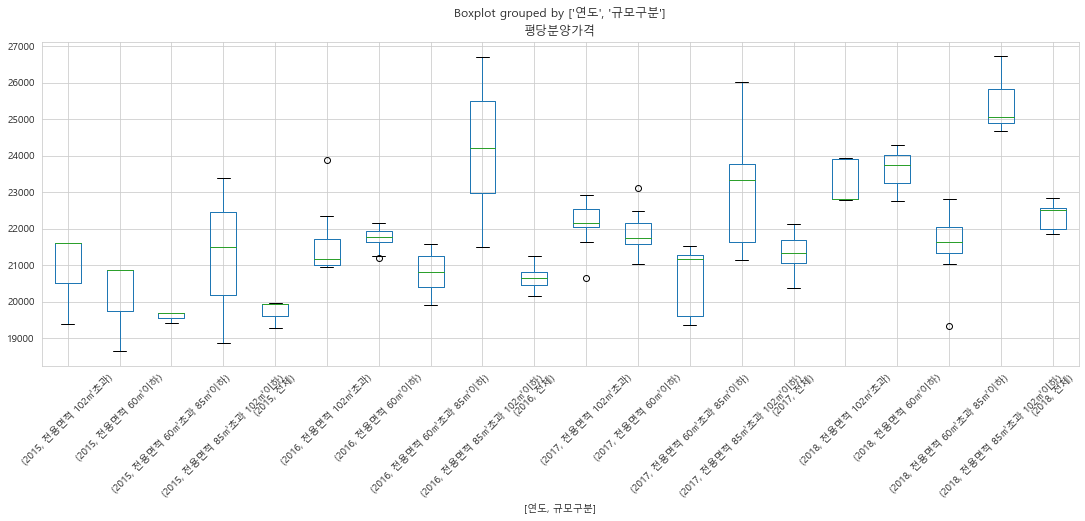

In [65]:
pre_sale_seoul[['연도', '규모구분', '평당분양가격']].boxplot(
by=['연도', '규모구분'], figsize=(18, 6), rot=45)

In [66]:
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']

In [67]:
pre_sale_jeju

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
80,제주,전체,2015,10,2232,2232.0,7365.0
81,제주,전용면적 60㎡이하,2015,10,,NaN,NaN
82,제주,전용면적 60㎡초과 85㎡이하,2015,10,2225,2225.0,7342.0
83,제주,전용면적 85㎡초과 102㎡이하,2015,10,2583,2583.0,8523.0
84,제주,전용면적 102㎡초과,2015,10,2574,2574.0,8494.0
...,...,...,...,...,...,...,...
2885,제주,전체,2018,7,3334,3334.0,11002.0
2886,제주,전용면적 60㎡이하,2018,7,NaN,NaN,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356,3356.0,11074.0
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226,3226.0,10645.0


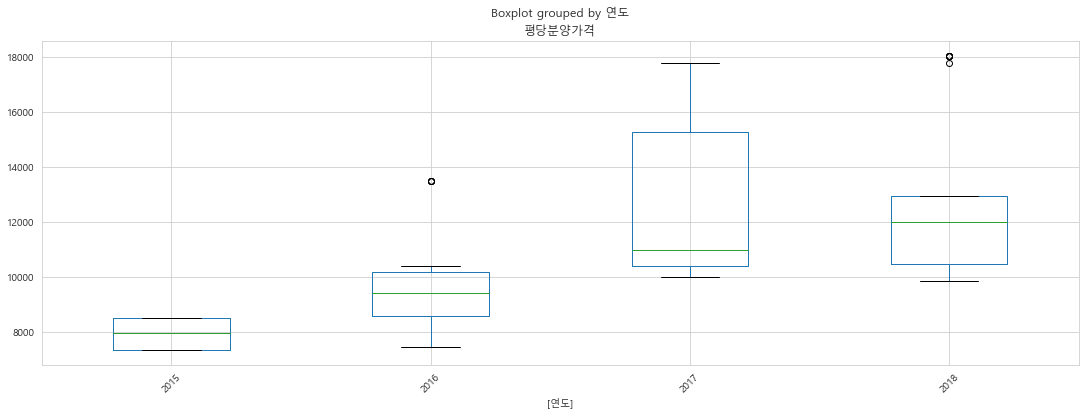

In [68]:
pre_sale_jeju[['연도', '규모구분', '평당분양가격']].boxplot(by=['연도'], figsize=(18, 6), rot=45)

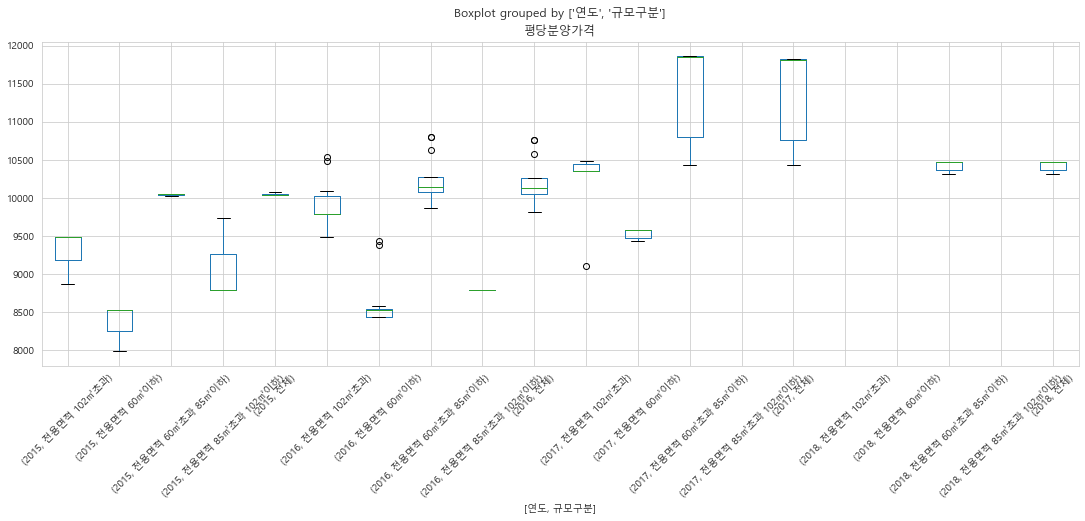

In [69]:

pre_sale_ulsan = pre_sale[pre_sale['지역명']=='울산']
# (ggplot(pre_sale_ulsan)
#  + aes(x='연도', y='평당분양가격', fill='규모구분')
#  + geom_boxplot()
#  + theme(text=element_text(family='NanumBarunGothic'))
# )
pre_sale_ulsan[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18, 6), rot=45)

In [70]:
pre_sale_ulsan

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
35,울산,전체,2015,10,3053,3053.0,10074.0
36,울산,전용면적 60㎡이하,2015,10,2422,2422.0,7992.0
37,울산,전용면적 60㎡초과 85㎡이하,2015,10,3040,3040.0,10032.0
38,울산,전용면적 85㎡초과 102㎡이하,2015,10,2951,2951.0,9738.0
39,울산,전용면적 102㎡초과,2015,10,2690,2690.0,8877.0
...,...,...,...,...,...,...,...
2840,울산,전체,2018,7,3125,3125.0,10312.0
2841,울산,전용면적 60㎡이하,2018,7,NaN,NaN,NaN
2842,울산,전용면적 60㎡초과 85㎡이하,2018,7,3125,3125.0,10312.0
2843,울산,전용면적 85㎡초과 102㎡이하,2018,7,NaN,NaN,NaN


In [71]:
pre_sale_ulsan.isnull().sum()

지역명         0
규모구분        0
연도          0
월           0
분양가격(㎡)    37
분양가격       41
평당분양가격     41
dtype: int64

## Tidy Data 만들기

In [136]:
df = pd.read_csv('data/apt_price/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv',
                encoding='euc-kr')
df.shape

(24, 27)

In [137]:
df

,□ 평균 분양가격,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
2,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
3,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
4,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
5,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
6,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
7,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
8,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
9,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414


In [138]:
year = df.iloc[1]
month = df.iloc[2]

In [139]:
year

□ 평균 분양가격                 구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 1, dtype: object

In [140]:
for i,y in enumerate(year):
    if i>2 and i<15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i>=15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i==2:
        year[i] = ' '.join([year[i], month[i]])
    elif i==1:
        year[i] = '시군구'    

In [141]:
print(year)

□ 평균 분양가격               구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 1, dtype: object


In [142]:
df.columns

Index(['□ 평균 분양가격', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26'],
      dtype='object')

In [143]:
df.columns = year

In [144]:
df

1,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
3,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
4,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
5,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
6,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
7,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
8,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
9,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414


In [145]:
df = df.drop(df.index[[0,1,2]])

In [146]:
df

1,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
3,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
4,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
5,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
6,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
7,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
8,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
9,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
10,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
11,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
12,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [147]:
pre_sale.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [148]:
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')
#값이 없으면 스페이스값으로

In [149]:
df['지역'] = df['구분'] + df['시군구']

In [150]:
df['지역']

3          전국
4          서울
5     6대광역시부산
6          대구
7          인천
8          광주
9          대전
10         울산
11           
12         경기
13        수도권
14         세종
15       지방강원
16         충북
17         충남
18         전북
19         전남
20         경북
21         경남
22         제주
23           
Name: 지역, dtype: object

In [151]:
df

1,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비,지역
3,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207,전국
4,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434",서울
5,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,327","9,345","9,515","9,559","9,581","9,608",1,430,477,6대광역시부산
6,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,446","8,568","8,542","8,542","8,795","8,863",27,400,350,대구
7,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131,인천
8,,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281,광주
9,,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,145","8,272","8,079","8,079","8,079","7,917",68,610,414,대전
10,,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"9,380","9,192","9,190","9,190","9,215","9,215",0,324,722,울산
11,,,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352,
12,경기,,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160,경기


In [152]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=1)

In [154]:
pre_sale.sample(3) #기존데이터 확인

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
2184,충남,전용면적 102㎡초과,2017,11,"2,283",NaN,NaN
2562,경기,전용면적 60㎡초과 85㎡이하,2018,4,3836,3836.0,12658.0
1525,제주,전체,2017,3,3097,3097.0,10220.0


In [100]:
df_2013_2015 = pd.melt? #wide한 데이터를 long하게 바꿔준다.

In [155]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월'])
df_2013_2015.head()

,지역,1,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [156]:
df_2013_2015.columns=['지역', '기간', '분양가']

In [157]:
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [158]:
year_test = ['2013', ' 12월']
year_test[1].strip().replace('월', '')

'12'

In [159]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(
    lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(
    lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [160]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


In [161]:
df

1,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비,지역
3,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207,전국
4,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434",서울
5,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,327","9,345","9,515","9,559","9,581","9,608",1,430,477,6대광역시부산
6,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,446","8,568","8,542","8,542","8,795","8,863",27,400,350,대구
7,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131,인천
8,,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281,광주
9,,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,145","8,272","8,079","8,079","8,079","7,917",68,610,414,대전
10,,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"9,380","9,192","9,190","9,190","9,215","9,215",0,324,722,울산
11,,,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352,
12,경기,,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160,경기


In [162]:
df_2013_2015

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12
...,...,...,...,...,...
457,전남,2015년 9월,"6,245",2015,9
458,경북,2015년 9월,"7,029",2015,9
459,경남,2015년 9월,"7,947",2015,9
460,제주,2015년 9월,"7,379",2015,9


## 지역명 강원과 부산 정리

In [163]:
df_2013_2015['지역'].value_counts()

           44
울산         22
경북         22
충남         22
대전         22
경기         22
세종         22
수도권        22
대구         22
경남         22
지방강원       22
서울         22
6대광역시부산    22
전남         22
전국         22
인천         22
충북         22
광주         22
제주         22
전북         22
Name: 지역, dtype: int64

In [164]:
df_2013_2015['지역'] = df_2013_2015['지역'].replace('6대광역시부산', '부산')

In [165]:
df_2013_2015['지역'] = df_2013_2015['지역'].replace('지방강원','강원')

In [166]:
df_2013_2015['지역'].value_counts()

       44
제주     22
경북     22
충남     22
대전     22
경기     22
부산     22
세종     22
수도권    22
대구     22
울산     22
전북     22
서울     22
전남     22
전국     22
인천     22
강원     22
광주     22
충북     22
경남     22
Name: 지역, dtype: int64

In [167]:

df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2014년 10월,"8,067",2014,5
freq,44,21,7,252,42


In [168]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null object
연도     462 non-null object
월      462 non-null object
dtypes: object(5)
memory usage: 9.1+ KB


In [171]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

In [172]:
df_2013_2015.sample(3)

,지역,기간,분양가,연도,월,분양가격
67,인천,2014년 3월,"10,408",2014,3,10408
12,강원,2013년 12월,"6,230",2013,12,6230
22,서울,2014년 1월,"17,925",2014,1,17925


## 2013-2015 데이터 시각화하기

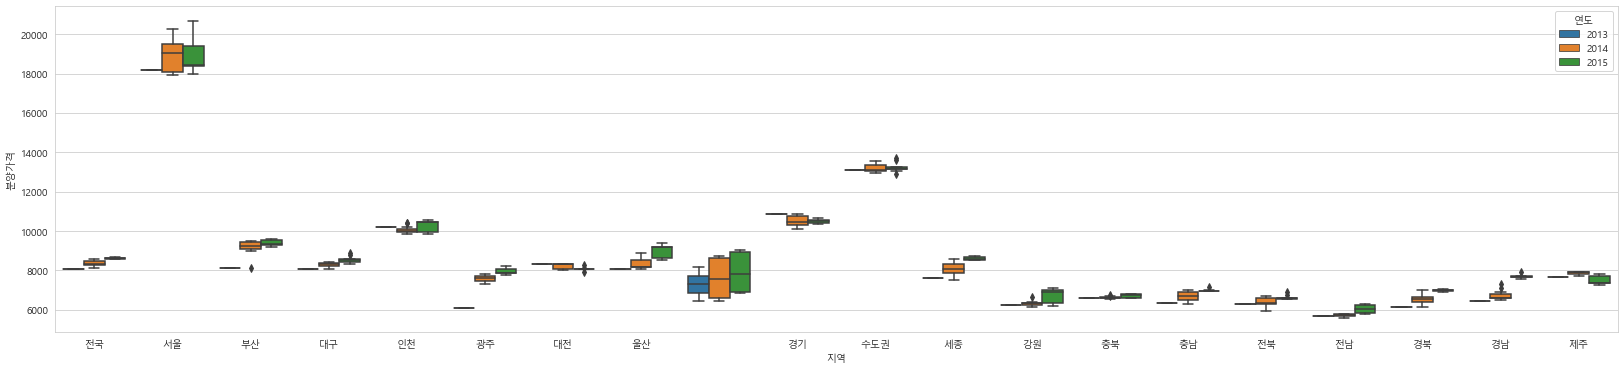

In [178]:
plt.figure(figsize=(28, 6))
sns.boxplot(data=df_2013_2015, x='지역', y='분양가격', hue='연도')

In [180]:
df_2013_2015[df_2013_2015.isnull()].shape

(462, 6)

## 2013 - 2018 데이터 합치기

In [181]:
df_2015_2018 = pre_sale[pre_sale['규모구분']=='전체']
df_2015_2018

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.0
5,인천,전체,2015,10,3163,3163.0,10437.0
10,경기,전체,2015,10,3138,3138.0,10355.0
15,부산,전체,2015,10,3112,3112.0,10269.0
20,대구,전체,2015,10,2682,2682.0,8850.0
...,...,...,...,...,...,...,...
2865,전북,전체,2018,7,2333,2333.0,7698.0
2870,전남,전체,2018,7,2357,2357.0,7778.0
2875,경북,전체,2018,7,2674,2674.0,8824.0
2880,경남,전체,2018,7,2696,2696.0,8896.0


In [182]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [183]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [184]:
df_2013_2018 = pd.concat?

In [188]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]

In [189]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

In [190]:
df_2013_2015_prepare.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [191]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]

In [192]:
df_2015_2018_prepare.describe()

,평당분양가격
count,561.000000
mean,9728.379679
std,3367.378611
min,6299.000000
25%,7497.000000
50%,8972.000000
75%,10560.000000
max,22832.000000


In [193]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])

In [194]:
df_2013_2018.shape

(1040, 4)

In [196]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059.0
1,서울,2013,12,18189.0
2,부산,2013,12,8111.0
3,대구,2013,12,8080.0
4,인천,2013,12,10204.0


In [198]:
df_2013_2015_region= df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [199]:

df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [200]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region]
exclude_region

['전국', '', '수도권']

In [201]:
df_2013_2018[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059.0
10,수도권,2013,12,13083.0
21,전국,2014,1,8130.0
31,수도권,2014,1,12995.0
42,전국,2014,2,8195.0


In [202]:
df_2013_2018.drop(
    df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, 
    axis=0, 
    inplace=True)
df_2013_2018.drop(
    df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, 
    axis=0, 
    inplace=True)

## 2013-2018 데이터 시각화

In [204]:
df_2013_2018

,지역명,연도,월,평당분양가격
1,서울,2013,12,18189.0
2,부산,2013,12,8111.0
3,대구,2013,12,8080.0
4,인천,2013,12,10204.0
5,광주,2013,12,6098.0
...,...,...,...,...
2865,전북,2018,7,7698.0
2870,전남,2018,7,7778.0
2875,경북,2018,7,8824.0
2880,경남,2018,7,8896.0


In [205]:
df_year_mean = df_2013_2018.groupby('연도')['평당분양가격'].mean()
df_year_mean

연도
2013     8059.294118
2014     8362.254902
2015     8667.341969
2016     9321.301020
2017     9900.823529
2018    10562.588235
Name: 평당분양가격, dtype: float64

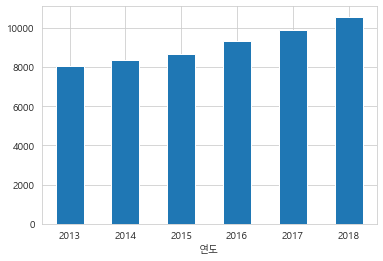

In [206]:
df_year_mean.plot.bar(rot=0)

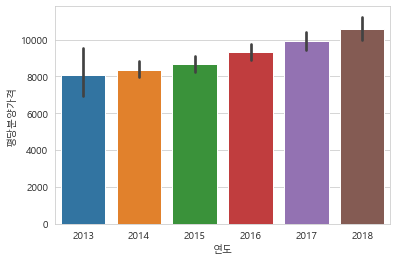

In [207]:
sns.barplot(data=df_2013_2018, x='연도', y='평당분양가격')

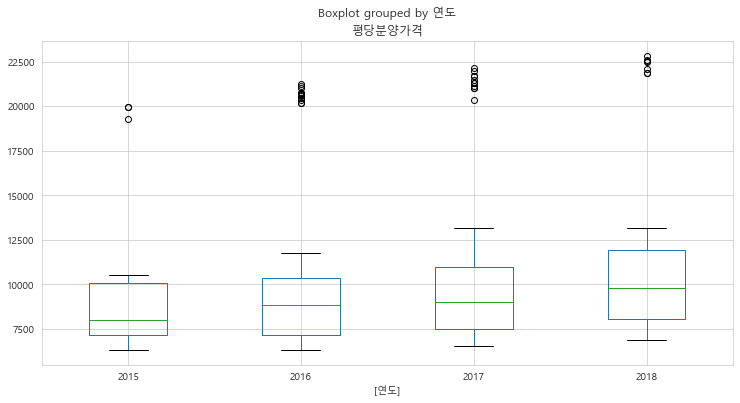

In [208]:

df_2015_2018_prepare[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))

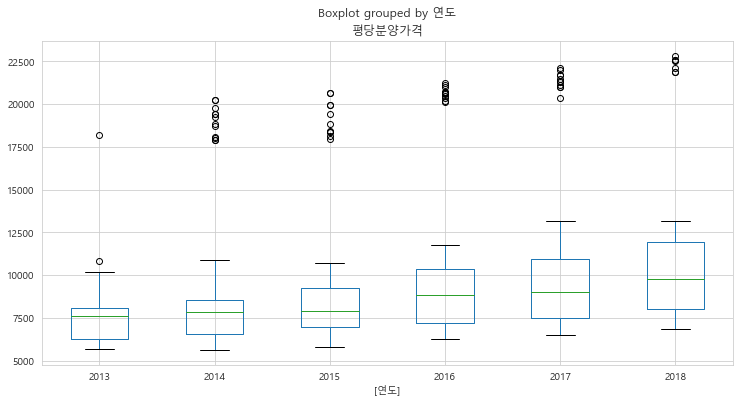

In [209]:
df_2013_2018[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))

In [210]:
df_2013_2018_jeju = df_2013_2018[df_2013_2018['지역명']=='제주']

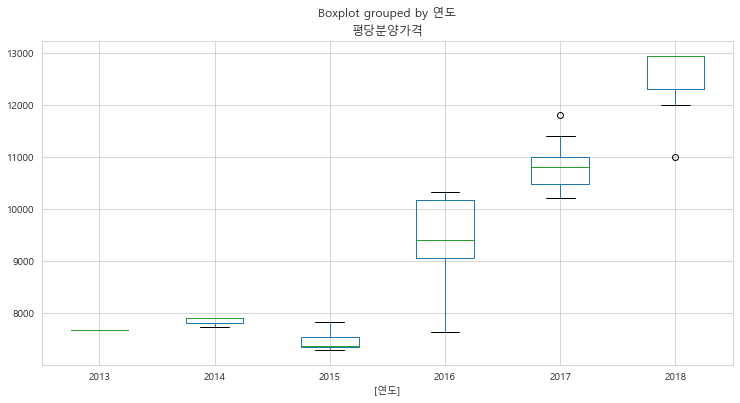

In [211]:
df_2013_2018_jeju[['연도','지역명','평당분양가격']].boxplot(by='연도', figsize=(12, 6))

In [212]:
df_2013_2018_jeju["연도"].value_counts()

2014    12
2015    12
2017    12
2016    10
2018     7
2013     1
Name: 연도, dtype: int64